In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
# iris data 표준정규분포 데이터로 전환
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data) # 데이터 변환할떄는 항상 fit _transform 사용


In [11]:
iris_std[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

- sklearn으로 차원 축소

In [7]:
from sklearn.decomposition import PCA  # 대문자는 클래스
pca= PCA(n_components=2) # 주성분 2개


In [12]:
iris_pca = pca.fit_transform(iris_std) #차원축소
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [16]:
pca.explained_variance_ratio_ # 원본데이터의 96%를 사용할 수 있음

array([0.72962445, 0.22850762])

pca분류  전후 비교

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2021, test_size=0.25
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8947368421052632

In [23]:
# PCA 데이터로 분류(96% 재현율 pca데이터 쓸만함)
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target, random_state=2021, test_size=0.25
)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8947368421052632

- 데이터 시각화

In [25]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head(
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


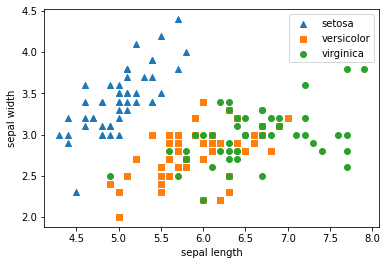

In [30]:
# sepal length vs sepal width(원본데이터)

markers = ['^','s','o'] #setosa-세모, versicolor-네모, virginica-원

for i, marker in enumerate(markers):
    x_axis_data = df[df.species ==i]['sepal length (cm)']
    y_axis_data = df[df.species ==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length'); plt.ylabel('sepal width')
plt.show()

In [32]:
# sepal length vs sepal width(PCA데이터)
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PC1,PC2
0,5.1,3.5,1.4,0.2,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,-2.389842,0.646835


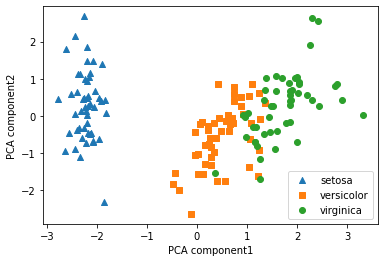

In [34]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.species ==i]['PC1'] #표준정규분포 데이터의 sepal length
    y_axis_data = df[df.species ==i]['PC2'] #표준정규분포 데이터의 sepal width
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('PCA component1'); plt.ylabel('PCA component2')
plt.show()